In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [65]:
# Load CSV file into a DataFrame
df = pd.read_csv('data/titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [66]:
df.drop('Name', axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [78]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=123)

In [68]:
print("\nTRAIN:")
display(df_train.head())
print("SHAPE:",df_train.shape)

print("\nTEST:")
display(df_test.head())
print("SHAPE:",df_test.shape)


TRAIN:


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
833,0,3,male,20.0,0,0,8.0500
97,1,2,female,34.0,0,1,23.0000
711,0,2,male,52.0,0,0,13.0000
43,1,3,female,19.0,0,0,7.8792
585,0,3,male,22.0,0,0,8.0500


SHAPE: (709, 7)

TEST:


,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
580,0,1,male,36.0,0,0,40.1250
814,0,3,male,43.0,0,0,6.4500
147,0,2,male,36.5,0,2,26.0000
134,0,2,male,23.0,0,0,15.0458
633,0,3,male,32.0,0,0,7.9250


SHAPE: (178, 7)


In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 709 entries, 833 to 510
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 709 non-null    int64  
 1   Pclass                   709 non-null    int64  
 2   Sex                      709 non-null    object 
 3   Age                      709 non-null    float64
 4   Siblings/Spouses Aboard  709 non-null    int64  
 5   Parents/Children Aboard  709 non-null    int64  
 6   Fare                     709 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 44.3+ KB


In [70]:
df_train.isna().sum()

Survived                   0
Pclass                     0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [71]:
df_train.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,0.377997,2.301834,29.915247,0.559944,0.389281,33.890884
std,0.485229,0.843225,14.173187,1.184112,0.823866,52.599894
min,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,32.500000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


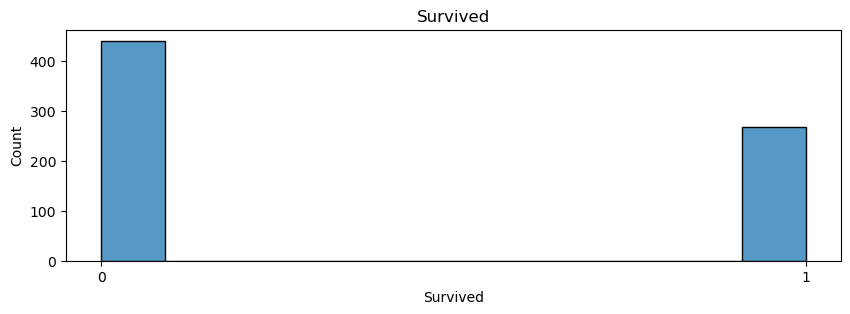

In [72]:
plt.figure(figsize=(10, 3))
sns.histplot(df_train['Survived'], kde=False)
plt.title('Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'])
plt.show()

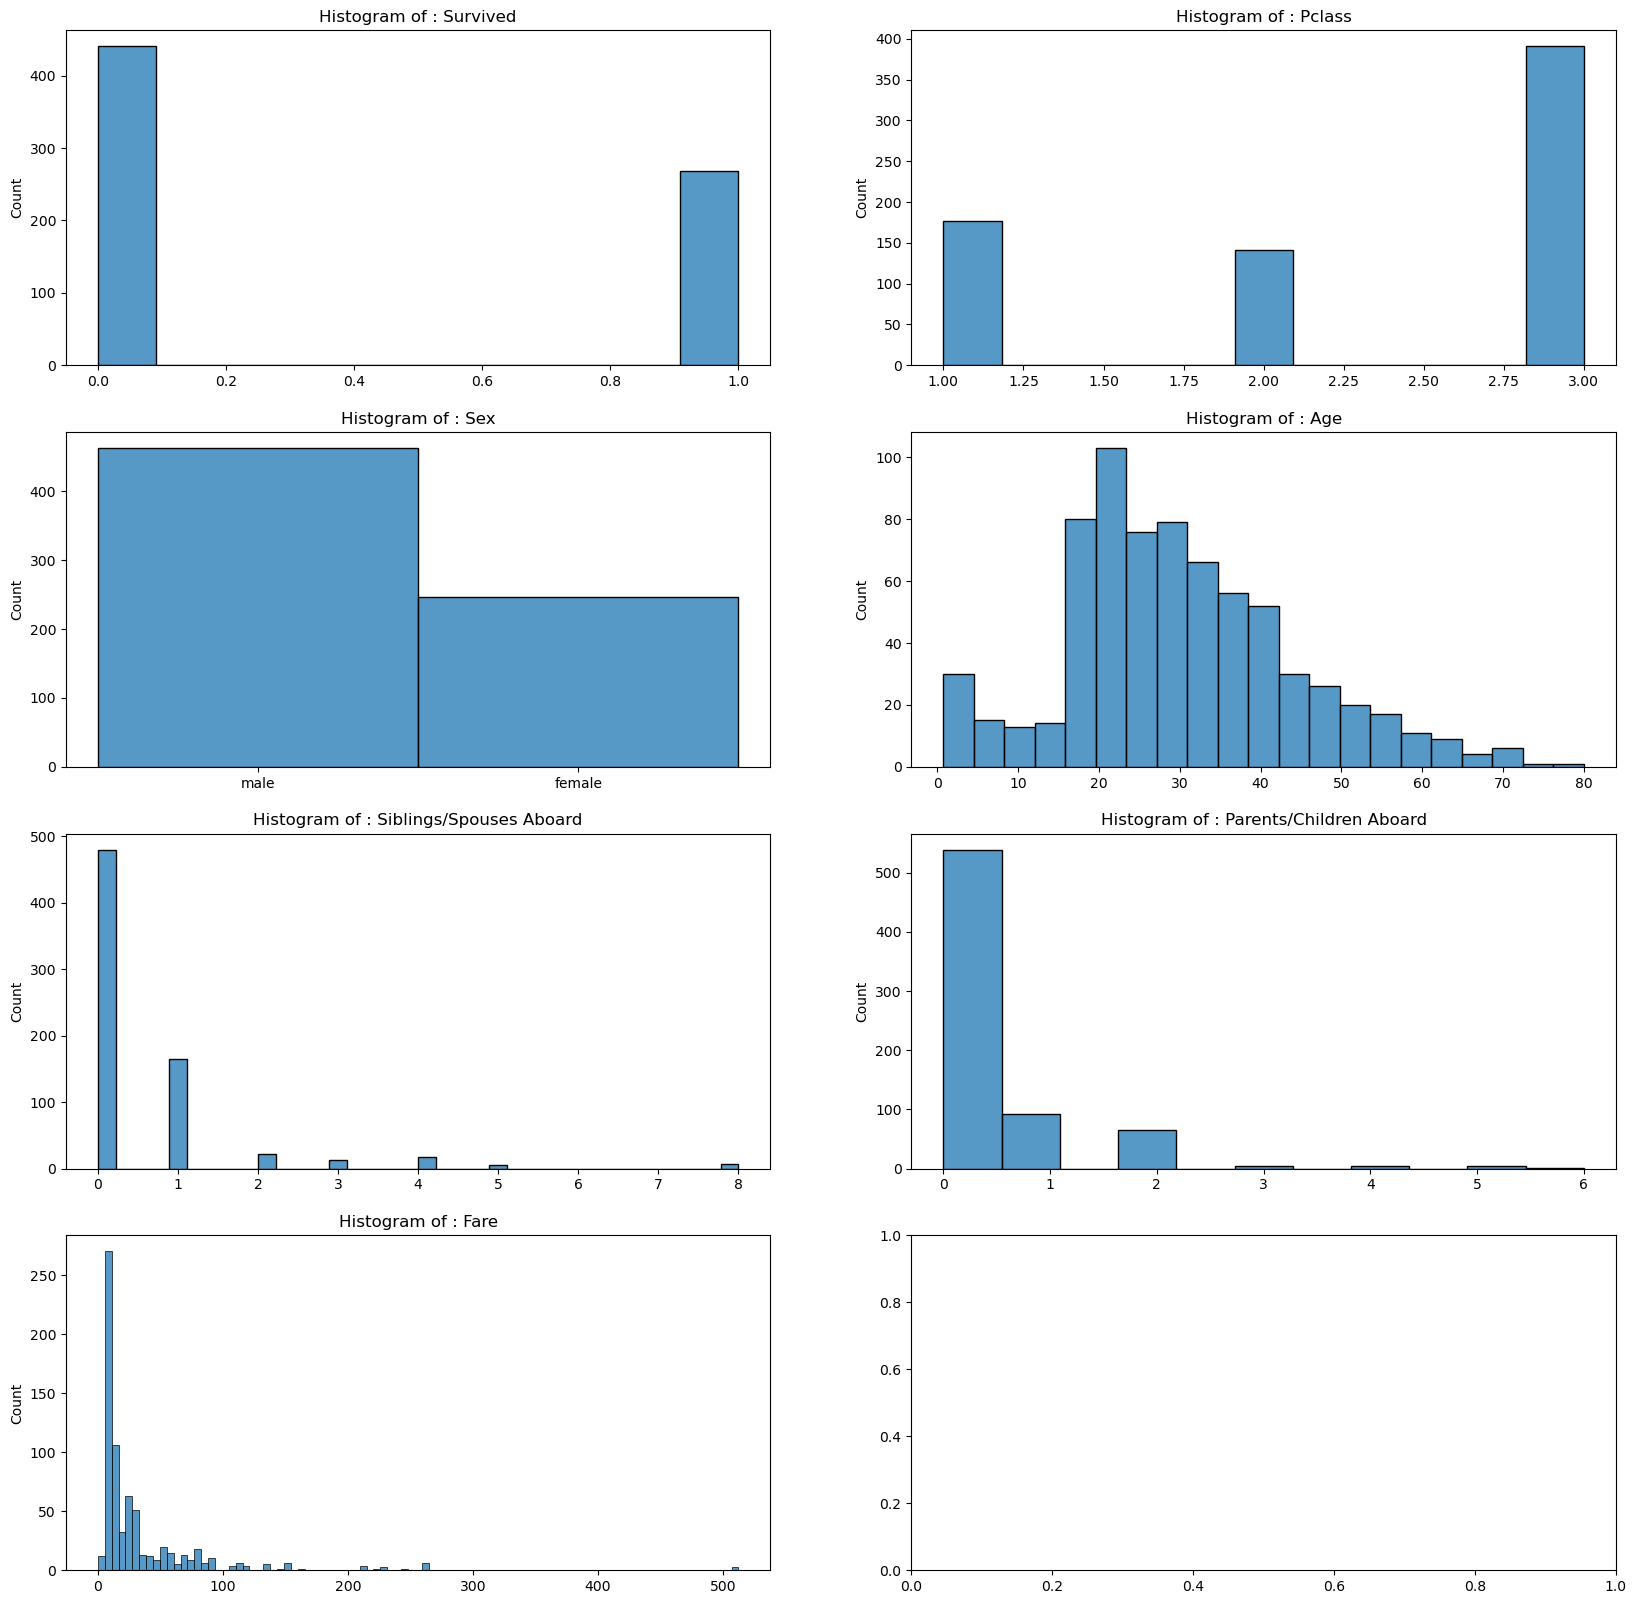

In [73]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))
for i, ax in zip(df_train.columns, axes.flat):
    sns.histplot(x=df_train[i], ax=ax).set(title=f"Histogram of : {i}", xlabel="")
plt.show()

In [74]:
import pandas as pd

# Assuming df is your DataFrame
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Sex'], prefix=['Sex'])

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original 'Sex' column
df.drop('Sex', axis=1, inplace=True)

# Display the resulting DataFrame
df.head()


,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,3,22.0,1,0,7.2500,False,True
1,1,1,38.0,1,0,71.2833,1,1,38.0,1,0,71.2833,True,False
2,1,3,26.0,0,0,7.9250,1,3,26.0,0,0,7.9250,True,False
3,1,1,35.0,1,0,53.1000,1,1,35.0,1,0,53.1000,True,False
4,0,3,35.0,0,0,8.0500,0,3,35.0,0,0,8.0500,False,True


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Age                      887 non-null    float64
 3   Siblings/Spouses Aboard  887 non-null    int64  
 4   Parents/Children Aboard  887 non-null    int64  
 5   Fare                     887 non-null    float64
 6   Survived                 887 non-null    int64  
 7   Pclass                   887 non-null    int64  
 8   Age                      887 non-null    float64
 9   Siblings/Spouses Aboard  887 non-null    int64  
 10  Parents/Children Aboard  887 non-null    int64  
 11  Fare                     887 non-null    float64
 12  Sex_female               887 non-null    bool   
 13  Sex_male                 887 non-null    bool   
dtypes: bool(2), float64(4), in

In [79]:
corr = df_train.corr(method="spearman")
corr

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
Survived,1.000000,-0.335232,-0.017302,0.057784,0.110248,0.310531,1.000000,-0.335232,-0.017302,0.057784,0.110248,0.310531,0.531721,-0.531721
Pclass,-0.335232,1.000000,-0.395677,-0.035209,0.003085,-0.677518,-0.335232,1.000000,-0.395677,-0.035209,0.003085,-0.677518,-0.119812,0.119812
Age,-0.017302,-0.395677,1.000000,-0.201893,-0.238823,0.154158,-0.017302,-0.395677,1.000000,-0.201893,-0.238823,0.154158,-0.086322,0.086322
Siblings/Spouses Aboard,0.057784,-0.035209,-0.201893,1.000000,0.465072,0.456497,0.057784,-0.035209,-0.201893,1.000000,0.465072,0.456497,0.155545,-0.155545
Parents/Children Aboard,0.110248,0.003085,-0.238823,0.465072,1.000000,0.411762,0.110248,0.003085,-0.238823,0.465072,1.000000,0.411762,0.250287,-0.250287
Fare,0.310531,-0.677518,0.154158,0.456497,0.411762,1.000000,0.310531,-0.677518,0.154158,0.456497,0.411762,1.000000,0.236849,-0.236849
Survived,1.000000,-0.335232,-0.017302,0.057784,0.110248,0.310531,1.000000,-0.335232,-0.017302,0.057784,0.110248,0.310531,0.531721,-0.531721
Pclass,-0.335232,1.000000,-0.395677,-0.035209,0.003085,-0.677518,-0.335232,1.000000,-0.395677,-0.035209,0.003085,-0.677518,-0.119812,0.119812
Age,-0.017302,-0.395677,1.000000,-0.201893,-0.238823,0.154158,-0.017302,-0.395677,1.000000,-0.201893,-0.238823,0.154158,-0.086322,0.086322
Siblings/Spouses Aboard,0.057784,-0.035209,-0.201893,1.000000,0.465072,0.456497,0.057784,-0.035209,-0.201893,1.000000,0.465072,0.456497,0.155545,-0.155545


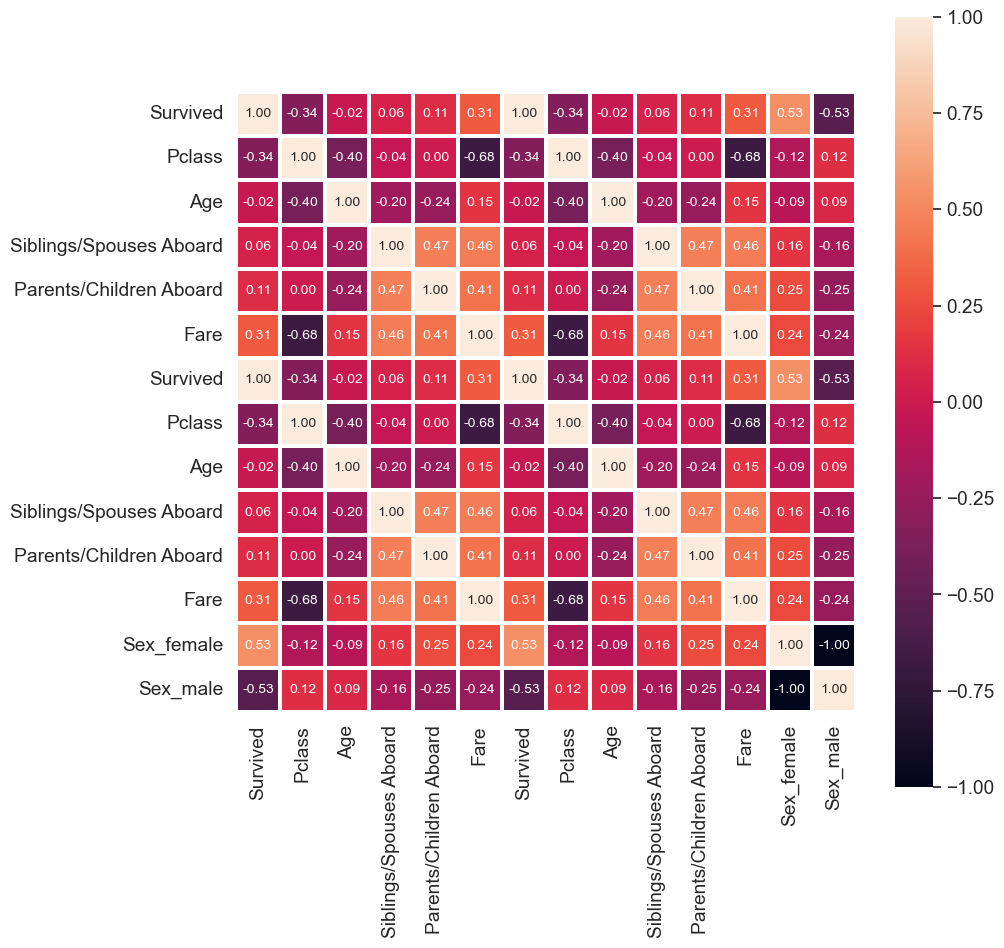

In [82]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(
    corr, linewidths=1.5, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}
)
plt.show()

In [88]:
df_train.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
833,0,3,20.0,0,0,8.0500,0,3,20.0,0,0,8.0500,False,True
97,1,2,34.0,0,1,23.0000,1,2,34.0,0,1,23.0000,True,False
711,0,2,52.0,0,0,13.0000,0,2,52.0,0,0,13.0000,False,True
43,1,3,19.0,0,0,7.8792,1,3,19.0,0,0,7.8792,True,False
585,0,3,22.0,0,0,8.0500,0,3,22.0,0,0,8.0500,False,True


In [115]:
y = df_train["Survived"].values
print(y.shape)

(709, 2)


In [127]:
y = df_train["Survived"].values

In [128]:
print(y.shape)

(709, 2)


In [133]:
# Assuming df_train is your DataFrame
y = df_train["Survived"].values

# Ensure y is 1-dimensional
y = y.squeeze()

# Convert to binary labels (1 for "Survived" and 0 for "Not Survived")
y_binary = y.astype(int)

# Check the shape
print("Shape of y:", y_binary.shape)

# Check the class distribution
class_distribution = np.bincount(y_binary)
print("Class distribution:\n", class_distribution)


Shape of y: (709, 2)


ValueError: object too deep for desired array